In [1]:
from simulation import *
import numpy as np
import matplotlib.pyplot as plt


def vlad_probability(S):
    return 100 * (S[2] + 1 / 2)



In [2]:
Sf_two_wires = run_particle(
    [1000, 0, 0],
    np.zeros(3),
    generate_two_wires(10, (10, 0), (-10, 0)),
    [-100, 100],
    [0, 1 / 2, 0],
)
print(f"Final S (two wires): {Sf_two_wires}")


Final S (two wires): [0.0, -0.3341026778772588, 0.37198820095437335]


In [3]:
Sf_vlad = run_particle(
    np.empty(3), np.empty(3), [Vladimirskii(10, -41.5)], [-10, 10], [0, 0, 1 / 2]
)
print(f"Final S (Vladimirskii): {Sf_vlad}")
print(f"-> Corresponding realignment probability: {vlad_probability(Sf_vlad)}%")


Final S (Vladimirskii): [0.038128768808304646, 0.4985431238584064, 0.0018758303140288075]
-> Corresponding realignment probability: 50.18758303140288%


In [4]:
Sf_rand_line = run_two_wires_line(1000, 10, (10, 0), (-10, 0), 100, [-100, 100])
print(f"Final S (rand line): {Sf_rand_line}")

shape = "square"
Sf_shape = run_two_wires_shape_2D(1000, 10, (10, 0), (-10, 0), 100, [-100, 100], shape)
print(f"Final S ({shape}): {Sf_shape}")


Final S (rand line): [ 0.40349963  0.00066487 -0.01124764]
Final S (square): [ 0.41997846 -0.0004926  -0.00246337]


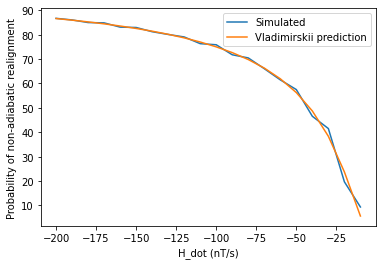

In [5]:
Hx = 10
H_dots = np.linspace(-10, -200, 20)
sim_ps = [
    vlad_probability(
        run_particle(
            np.empty(3),
            np.empty(3),
            [Vladimirskii(Hx, H_dot)],
            [-10, 10],
            [0, 0, 1 / 2],
        )
    )
    for H_dot in H_dots
]

vlad_ps = [np.exp(-np.pi * Hx * Hx / H_dot * -0.09162) * 100 for H_dot in H_dots]

plt.plot(H_dots, sim_ps, label="Simulated")
plt.plot(H_dots, vlad_ps, label="Vladimirskii prediction")
plt.xlabel("H_dot (nT/s)")
plt.ylabel("Probability of non-adiabatic realignment")
plt.legend()
plt.show()


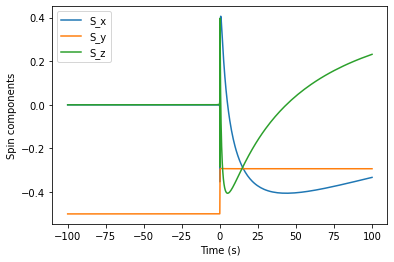

In [6]:
_, ts, spins = run_particle_outputs(
    [1000, 0, 0],
    [0, 4.5, 0],
    generate_two_wires(10, (10, 0), (10, 0)),
    [-100, 100],
    [0, -1 / 2, 0],
)

plt.plot(ts, list(zip(*spins)), label=("S_x", "S_y", "S_z"))
plt.xlabel("Time (s)")
plt.ylabel("Spin components")
plt.legend()
plt.show()
